# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

#Business Understanding
The dataset contains information on used cars and their sale prices in the United States, including vehicle specifications and condition. It is ideally suited for developing a model to predict used-car prices. Because the dataset encompasses multiple manufacturers and models, a single regression model may struggle to capture the distinct pricing dynamics of each. For example, the average price of a Ford Corolla is approximately 22,325, whereas a Mercedes-Benz S-Class can exceed 90,000. For this reason, it is more effective to train separate regression models for individual car models. Given that the Ford F-150 is among the most popular vehicles in the U.S., we will focus on building a regression model to understand how its specifications and condition influence its used-car price.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import textwrap
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [61]:
data = pd.read_csv('data/vehicles.csv')
print(data.shape)
data.head()


(426880, 18)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [62]:
#Fetch Ford f-150 data
f150_data = data[
    (data['manufacturer'] == 'ford') &
    (
        data['model'].str.contains('f150', case=False, na=False) |
        data['model'].str.contains('f-150', case=False, na=False) |
        data['model'].str.contains('F-150', case=False, na=False) |
        data['model'].str.contains('F150', case=False, na=False)
    )
]
f150_data.to_csv('data/f150_data.csv', index=False)

In [63]:
f150_data.isna().sum()

,0
id,0
region,0
price,0
year,0
manufacturer,0
model,0
condition,8006
cylinders,6491
fuel,77
odometer,170


In [64]:
f150_data.sample(20)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
363231,7307750513,amarillo,34125,2017.0,ford,f-150,NaN,6 cylinders,gas,31307.0,clean,automatic,NaN,rwd,full-size,pickup,white,tx
156504,7316355810,des moines,6995,1988.0,ford,f-150,good,8 cylinders,gas,75728.0,clean,automatic,1FTEX15N9JKA99564,NaN,full-size,NaN,blue,ia
5590,7314510256,anchorage / mat-su,26995,2016.0,ford,f-150,NaN,NaN,gas,100825.0,clean,automatic,1FTEW1EP5GKE56588,4wd,NaN,pickup,NaN,ak
69991,7302236988,visalia-tulare,26995,2017.0,ford,f-150 xlt,excellent,8 cylinders,gas,110130.0,clean,automatic,1FTEW1EF7HKD11819,4wd,full-size,truck,silver,ca
422905,7314827680,milwaukee,15120,2008.0,ford,f-150,good,8 cylinders,gas,106639.0,clean,automatic,1FTPX14V98FB65849,4wd,full-size,truck,black,wi
298291,7314940415,dayton / springfield,39990,2018.0,ford,f150 supercrew cab lariat,good,6 cylinders,gas,32143.0,clean,other,1FTEW1EP7JKE28556,4wd,NaN,pickup,blue,oh
364190,7315427774,austin,31495,2015.0,ford,f-150,NaN,6 cylinders,gas,87730.0,clean,automatic,NaN,4wd,full-size,pickup,blue,tx
195480,7311900353,central michigan,7995,2010.0,ford,f-150,NaN,NaN,gas,207891.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,mi
419891,7315598310,madison,22995,2015.0,ford,f150 supercrew cab,excellent,8 cylinders,gas,122075.0,clean,automatic,1FTEW1EF1FKE72051,4wd,NaN,NaN,NaN,wi
308531,7314277193,tulsa,39998,2017.0,ford,f-150,NaN,NaN,gas,23510.0,clean,automatic,1FTEW1EPXHFA10172,4wd,NaN,NaN,red,ok


#**Analysis**
As we can see above the dataset consists of muliple string variables. For strings we maily want to eaither do one-hot encoding to or do lable-based encoding if there is a noatural ordering in the string variables. For missing values we want to try to fill them up based on other values. Example: Missing Drive value can be filled up from "model" value, as many of the F150 "model" values have 4x4, 4wd, 2wd mentioned in the name.

In [65]:
model = pd.DataFrame(f150_data['model'].unique())
model.to_csv('data/model.csv', index=False)

# **Adding a Trim label**

Ford f-150 consists of the following trims below. As these trims have a natural order in terms of prince we can do label-based encoding and assign them numeric labels based on the trims base prics.

Created a file named model.csv with all unique model names. I manually assigned trim labels for all unique entries for f-150 based in the model column and store the value in /data/labels.csv. The labels from this file can be used to assign trim based labels for all entries in the csv where trim label is not nil.
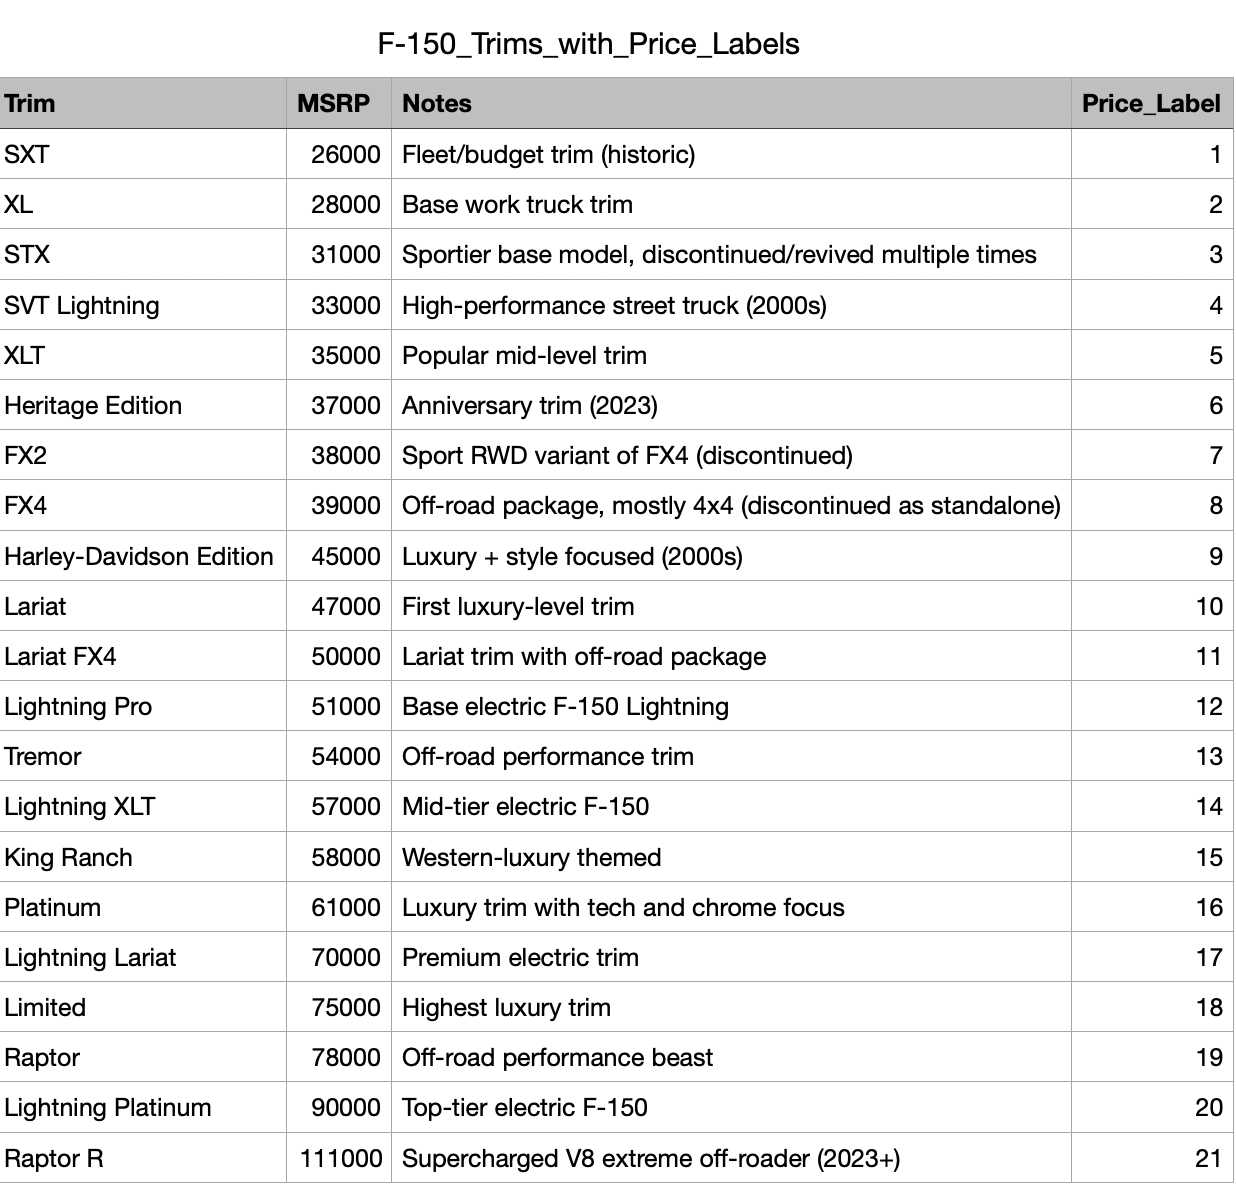


In [66]:
def assign_labels(input_df: pd.DataFrame, label_file: str = "data/label.csv") -> pd.DataFrame:
    # Load the label file
    label_df = pd.read_csv(label_file)

    # Normalize model names for matching
    input_df['model'] = input_df['model'].str.lower().str.strip()
    label_df['model'] = label_df['model'].str.lower().str.strip()

    # Merge based on the model column
    result_df = input_df.merge(label_df[['model', 'price_label']], on='model', how='left')

    # Rename for clarity
    result_df = result_df.rename(columns={'price_label': 'label_name'})

    return result_df

f150_data= assign_labels(f150_data)
f150_data.to_csv('data/f150.csv', index=False)


In [67]:
#Based in cylinders mentioned convert cylinders column from string to int, by creating a new column called cylinder_count
def extract_cylinder_count(df: pd.DataFrame) -> pd.DataFrame:
    """
    Extracts the cylinder count from the 'cylinders' column if it's one of the specified values.
    """
    df = df.copy()
    df['cylinders'] = df['cylinders'].str.lower().astype(str) # Ensure it's string type

    # Define the list of valid cylinder counts
    valid_cylinders = ['3', '4', '5', '6', '8', '10']

    def get_cylinder_int(cylinder_str):
        for num in valid_cylinders:
            if num in cylinder_str:
                return int(num)
        return np.nan # Return NaN if no valid cylinder count is found

    df['cylinder_count'] = df['cylinders'].apply(get_cylinder_int)
    return df

f150_data = extract_cylinder_count(f150_data)
#display occurence count of each attribute in cylinder_count column
print(f150_data['cylinder_count'].value_counts())



cylinder_count
6.0     4866
8.0     4540
4.0       14
10.0      11
5.0        2
3.0        1
Name: count, dtype: int64


In [68]:
"""
    Adds a new column 'drive_count' to the input DataFrame based on logic:
    - If drive is '4wd' → 4
    - If drive is 'fwd' or 'rwd' → 2
    - If drive is NaN, checks model:
        - If model contains '4x4', '4wd', or 'fx4' (case-insensitive) → 4
        - Else → 2
"""
def assign_drive_count(df: pd.DataFrame) -> pd.DataFrame:
    def infer_drive(row):
        drive = str(row['drive']).lower() if pd.notnull(row['drive']) else None
        model = str(row['model']).lower()

        if drive == '4wd':
            return 4
        elif drive in ('fwd', 'rwd'):
            return 2
        elif pd.isna(row['drive']):
            if any(x in model for x in ['4x4', '4wd', 'fx4']):
                return 4
            else:
                return 2
        else:
            # For any other unknown drive value, default to 2
            return 2

    df = df.copy()
    df['drive_count'] = df.apply(infer_drive, axis=1)
    return df

f150_data= assign_drive_count(f150_data)
print(f150_data['drive_count'].value_counts())


drive_count
4    10083
2     5852
Name: count, dtype: int64


In [71]:

def assign_condition_label(df: pd.DataFrame) -> pd.DataFrame:
    """
    Adds a new column 'condition_label' to assign int labels for the 'condition' column in the order of there condition.
    """
    df = df.copy()
    condition_mapping = {
        'salvage': 1,
        'fair': 2,
        'good': 3,
        'excellent': 4,
        'like new': 5,
        'new': 6
    }
    df['condition_label'] = df['condition'].map(condition_mapping)
    return df

f150_data= assign_condition_label(f150_data)
f150_data
print(f150_data['condition_label'].value_counts())


condition_label
4.0    3502
3.0    3450
5.0     716
2.0     228
6.0      17
1.0      16
Name: count, dtype: int64


In [72]:
#Read from data/state_income.csv into a dataframe and add a new column in f150_data data to add per_capita income by joining both dataframes
state_income = pd.read_csv('data/state_income.csv')
state_income['state'] = state_income['state'].str.lower()
f150_data = f150_data.merge(state_income[['state', 'Per_Capita_Income']], left_on='state', right_on='state', how='left')

#Paint_Color column

The image below shows data about percentage of each color for cars accross USA. Based on th below image, we classify all colors with more than 5% share as common and the rest as rare colors.
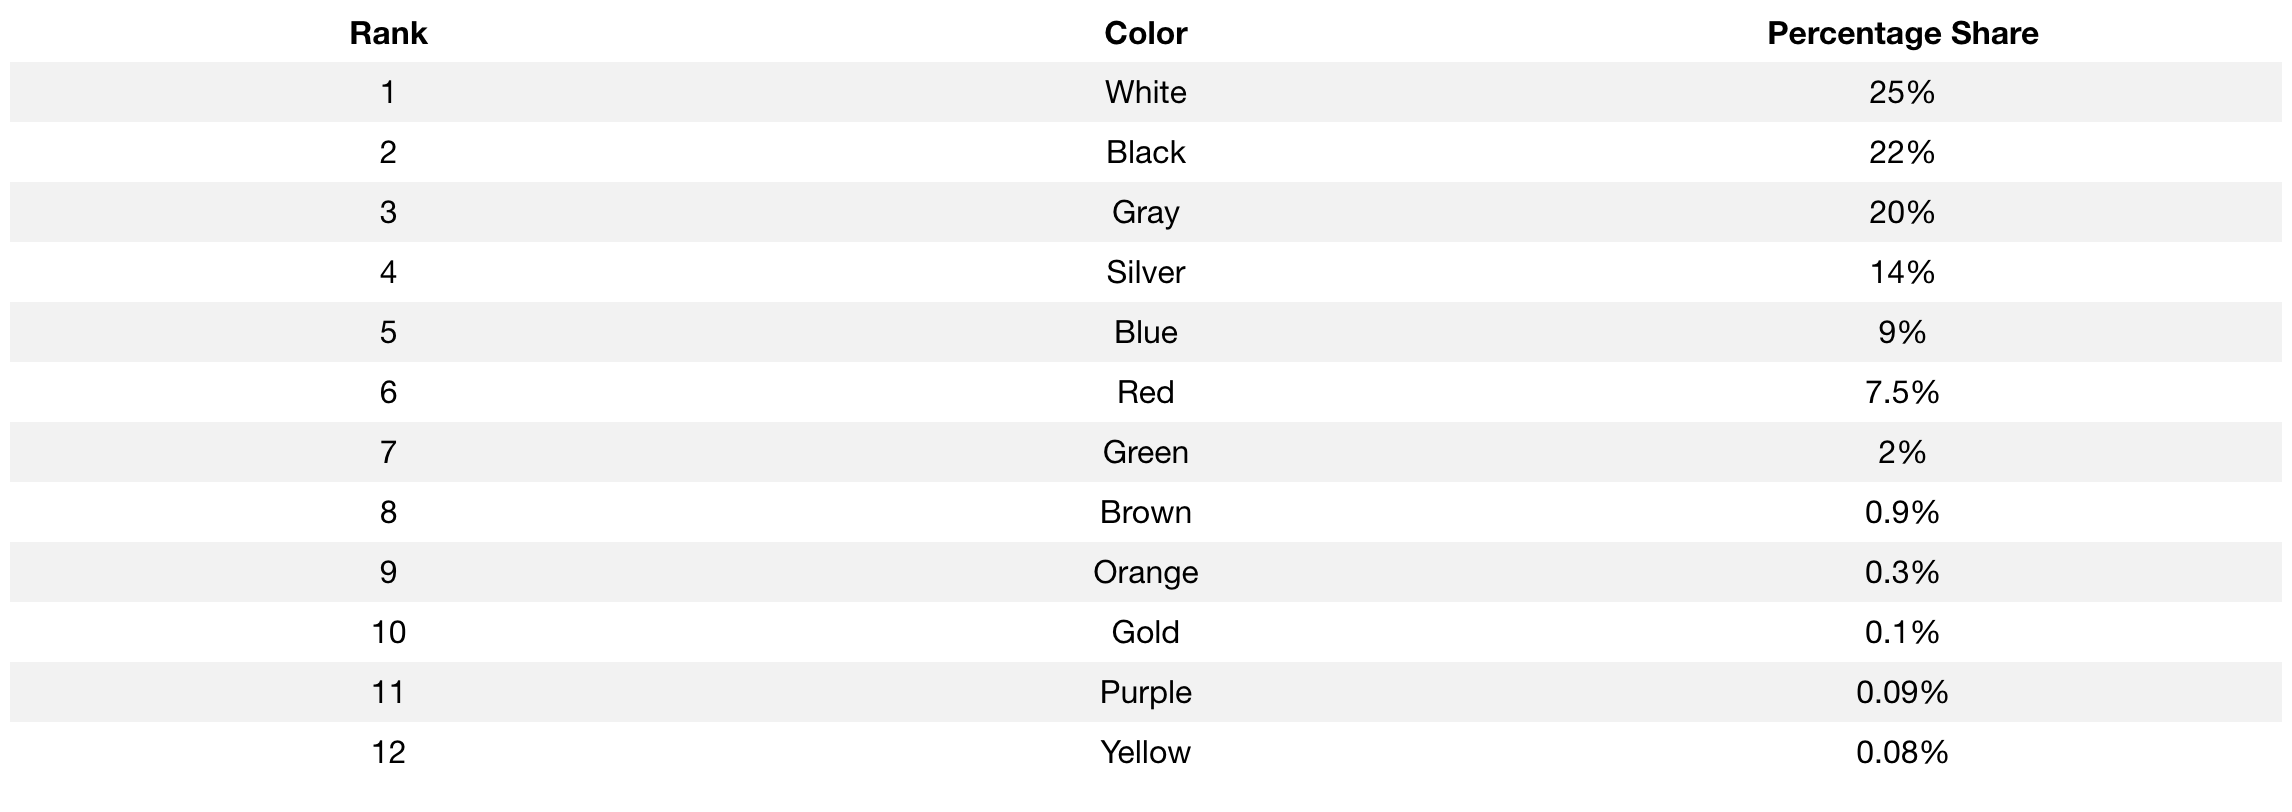



In [73]:
common_colors=['white', 'black', 'silver', 'red', 'blue', 'grey']
#Classify all colors into common or rare colors category.
f150_data['color'] = f150_data['paint_color'].apply(lambda x: 'common' if x in common_colors or pd.isna(x) else 'rare')
print(f150_data['color'].value_counts())


color
common    15096
rare        839
Name: count, dtype: int64


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [74]:
print(f150_data.isna().sum())

id                       0
region                   0
price                    0
year                     0
manufacturer             0
model                    0
condition             8006
cylinders                0
fuel                    77
odometer               170
title_status           239
transmission            59
VIN                   5294
drive                 4055
size                 11540
type                  3474
paint_color           4797
state                    0
label_name               0
cylinder_count        6501
drive_count              0
condition_label       8006
color                    0
Per_Capita_Income        0
dtype: int64


In [75]:
# #transmission drop na
f150_data = f150_data.dropna(subset=['transmission'])
# #title_status drop na
f150_data = f150_data.dropna(subset=['title_status'])
#odometer drop na
f150_data = f150_data.dropna(subset=['odometer'])


#ONE-HOT ENCODING
Do One-Hot encoding for all non-intiger columns

In [76]:
#Do one hot encoding on title_status
f150_data = pd.get_dummies(f150_data, columns=['title_status'], drop_first=True)
#Do one hot encoding on transmission
f150_data = pd.get_dummies(f150_data, columns=['transmission'], drop_first=True)
f150_data

#Do one hot encoding for color
f150_data = pd.get_dummies(f150_data, columns=['color'], drop_first=True)

#Do one-hot encoding for fuel
f150_data = pd.get_dummies(f150_data, columns=['fuel'], drop_first=True)

f150_data.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
id,region,price,year,manufacturer,model,condition,cylinders,odometer,VIN,drive,size,type,paint_color,state,label_name,cylinder_count,drive_count,condition_label,Per_Capita_Income,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,color_rare,fuel_gas,fuel_hybrid,fuel_other,
7317069376,south dakota,8499,1995.0,ford,f-150,good,8 cylinders,115223.0,1FTEX14H6SKA49766,fwd,full-size,pickup,white,sd,-1,8.0,2,3.0,68176.0,False,False,False,False,False,False,False,False,True,False,False,1
7301671955,waterloo / cedar falls,0,2010.0,ford,f-150,excellent,8 cylinders,190895.0,1FTFW1EV5AFD09951,4wd,full-size,pickup,red,ia,-1,8.0,4,4.0,60222.0,False,False,False,False,False,False,False,False,True,False,False,1
7301699921,green bay,6795,2006.0,ford,f-150 xlt,good,8 cylinders,124500.0,1FTPX14V66NB58277,4wd,full-size,pickup,brown,wi,5,8.0,4,3.0,61475.0,False,False,False,False,False,False,False,True,True,False,False,1
7301807751,redding,34995,2015.0,ford,f150 4x4,like new,6 cylinders,57765.0,1FTEW1EG3FFB99082,4wd,full-size,pickup,grey,ca,-1,6.0,4,5.0,77036.0,False,False,False,False,False,False,False,False,True,False,False,1
7301808692,redding,16995,2010.0,ford,f150 4x4,like new,8 cylinders,120619.0,1FTFX1EV3AFA71014,4wd,full-size,pickup,white,ca,-1,8.0,4,5.0,77036.0,False,False,False,False,False,False,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302238127,des moines,8950,2010.0,ford,f-150,good,8 cylinders,213593.0,1FTFW1EV7AFB57400,4wd,full-size,truck,blue,ia,-1,8.0,4,3.0,60222.0,False,False,False,False,False,False,False,False,True,False,False,1
7302236988,visalia-tulare,26995,2017.0,ford,f-150 xlt,excellent,8 cylinders,110130.0,1FTEW1EF7HKD11819,4wd,full-size,truck,silver,ca,5,8.0,4,4.0,77036.0,False,False,False,False,False,False,False,False,True,False,False,1
7302231985,appleton-oshkosh-FDL,31800,2014.0,ford,f-150,excellent,6 cylinders,61209.0,1FTFW1ETXEFB50316,4wd,mid-size,truck,silver,wi,-1,6.0,4,4.0,61475.0,False,False,False,False,False,False,False,False,True,False,False,1


#Drop all string columns

In [77]:
#Drop manufacturer, VIN, type, Size, type, id, state, region, model, condition, cylinders, fuel, paint_color
f150_data =f150_data.drop(columns=['manufacturer', 'VIN', 'type', 'size', 'id', 'drive','region', 'model', 'condition', 'cylinders', 'paint_color', 'state'], axis=1)
f150_data


,price,year,odometer,label_name,cylinder_count,drive_count,condition_label,Per_Capita_Income,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,color_rare,fuel_gas,fuel_hybrid,fuel_other
0,15000,2013.0,128000.0,5,6.0,2,4.0,50916.0,False,False,False,False,False,False,False,False,True,False,False
1,34590,2018.0,20856.0,2,6.0,2,3.0,50916.0,False,False,False,False,False,False,True,False,True,False,False
2,38990,2020.0,12231.0,5,6.0,2,3.0,50916.0,False,False,False,False,False,False,True,False,True,False,False
3,26990,2016.0,14230.0,2,6.0,2,3.0,50916.0,False,False,False,False,False,False,True,False,True,False,False
4,22590,2013.0,14169.0,2,6.0,2,3.0,50916.0,False,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15930,18999,2014.0,176261.0,5,8.0,4,4.0,73248.0,False,False,False,False,False,False,False,False,True,False,False
15931,24999,2014.0,147540.0,15,6.0,4,4.0,73248.0,False,False,False,False,False,False,False,False,True,False,False
15932,950,1995.0,209452.0,-1,8.0,4,NaN,73248.0,False,False,False,False,False,False,False,False,True,False,False
15933,47950,2020.0,4100.0,-1,8.0,4,5.0,73248.0,False,False,False,False,False,False,False,False,True,False,False


In [78]:
print(f150_data.isna().sum())

price                         0
year                          0
odometer                      0
label_name                    0
cylinder_count             6328
drive_count                   0
condition_label            7824
Per_Capita_Income             0
title_status_lien             0
title_status_missing          0
title_status_parts only       0
title_status_rebuilt          0
title_status_salvage          0
transmission_manual           0
transmission_other            0
color_rare                    0
fuel_gas                      0
fuel_hybrid                   0
fuel_other                    0
dtype: int64


#Clean PRICE column

In [79]:
f150_data['price'].describe()


,price
count,15489.000000
mean,22707.753954
std,20433.413742
min,0.000000
25%,9800.000000
50%,22590.000000
75%,33990.000000
max,1000000.000000


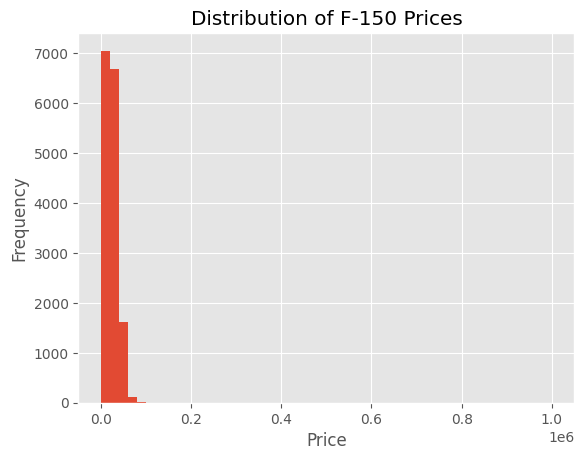

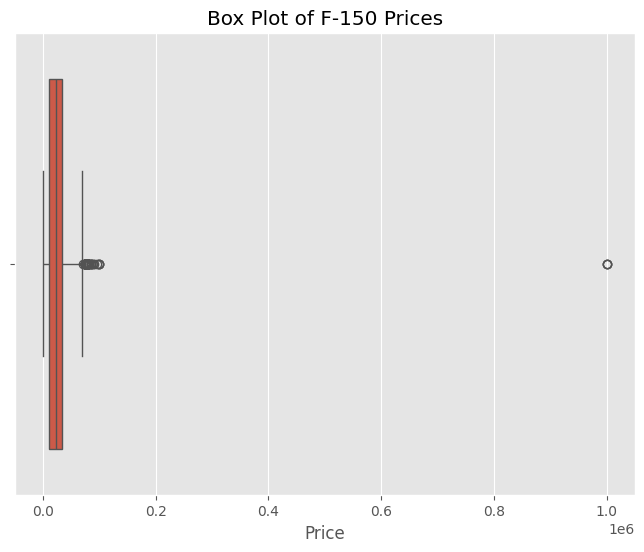

In [80]:
#Price column Hist and box plot to show distribution
f150_data['price'].hist(bins=50)
plt.title('Distribution of F-150 Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=f150_data['price'])
plt.title('Box Plot of F-150 Prices')
plt.xlabel('Price')
plt.show()

In [81]:
#Remove outliers for the price coloumn using Interquartile Range (IQR) technique. This removes about 40 columns
Q1 = f150_data['price'].quantile(0.25)
Q3 = f150_data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

f150_data_cleaned = f150_data[(f150_data['price'] >= lower_bound) & (f150_data['price'] <= upper_bound)].copy()

print(f"Original number of rows: {len(f150_data)}")
print(f"Number of rows after outlier removal: {len(f150_data_cleaned)}")

#drop columns when price is 0
f150_data_cleaned = f150_data_cleaned[f150_data_cleaned['price'] != 0]


Original number of rows: 15489
Number of rows after outlier removal: 15443


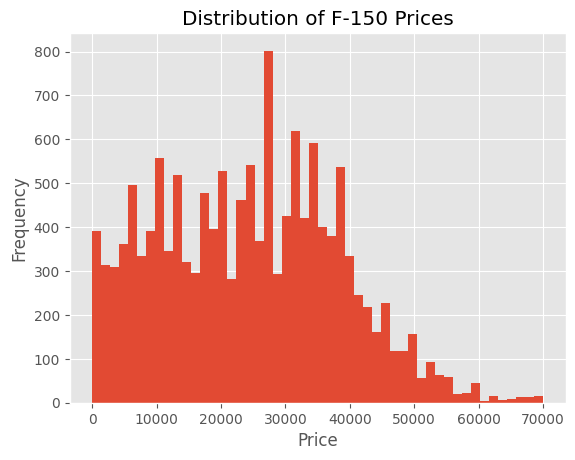

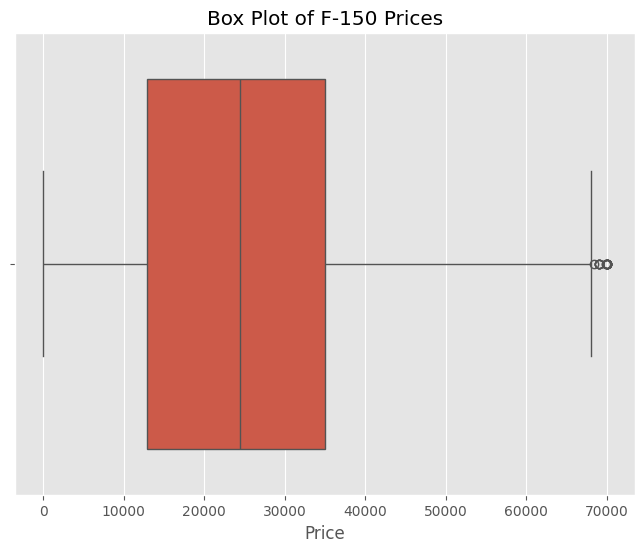

In [82]:
f150_data_cleaned['price'].hist(bins=50)
plt.title('Distribution of F-150 Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=f150_data_cleaned['price'])
plt.title('Box Plot of F-150 Prices')
plt.xlabel('Price')
plt.show()

#Clean odometer column

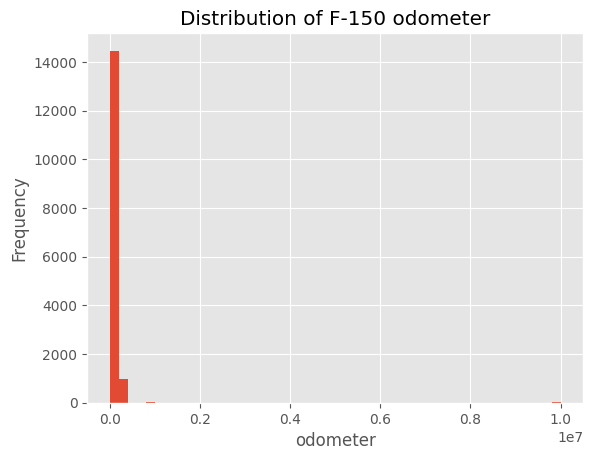

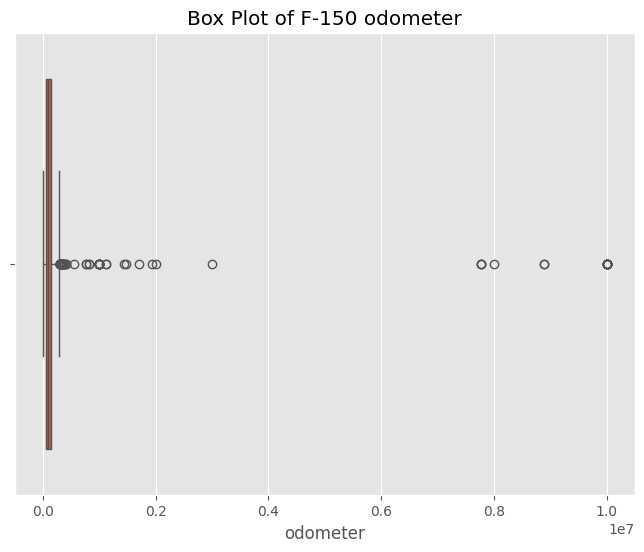

,odometer
count,1.548900e+04
mean,1.095290e+05
std,3.178996e+05
min,0.000000e+00
25%,4.423800e+04
50%,9.335000e+04
75%,1.431000e+05
max,1.000000e+07


In [83]:
f150_data['odometer'].hist(bins=50)
plt.title('Distribution of F-150 odometer')
plt.xlabel('odometer')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=f150_data['odometer'])
plt.title('Box Plot of F-150 odometer')
plt.xlabel('odometer')
plt.show()

f150_data['odometer'].describe()

In [84]:
#Remove outliers for the odometer coloumn using Interquartile Range (IQR) technique only for the top outliers
Q1 = f150_data_cleaned['odometer'].quantile(0.25)
Q3 = f150_data_cleaned['odometer'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

f150_data_cleaned = f150_data_cleaned[(f150_data_cleaned['odometer'] <= upper_bound)].copy()

print(f"Original number of rows: {len(f150_data)}")
print(f"Number of rows after outlier removal: {len(f150_data_cleaned)}")

Original number of rows: 15489
Number of rows after outlier removal: 14133


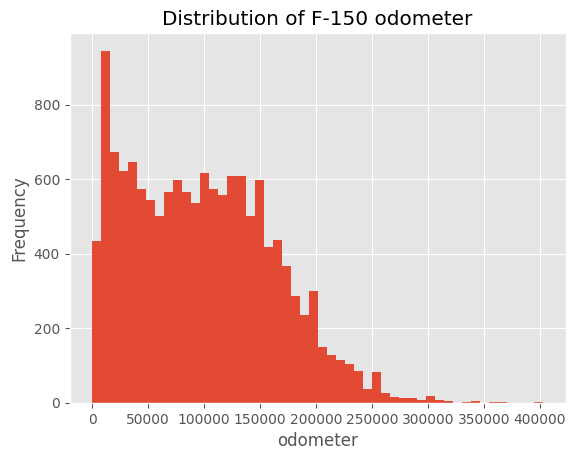

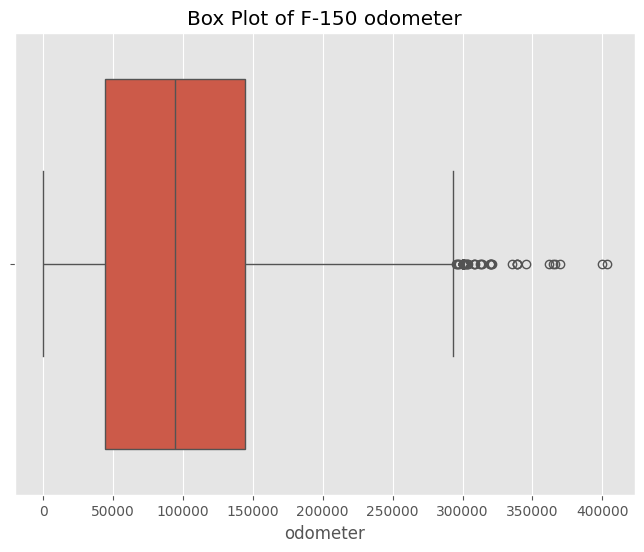

,odometer
count,14133.000000
mean,98384.418383
std,63527.312406
min,0.000000
25%,44081.000000
50%,94094.000000
75%,144120.000000
max,403051.000000


In [85]:
f150_data_cleaned['odometer'].hist(bins=50)
plt.title('Distribution of F-150 odometer')
plt.xlabel('odometer')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=f150_data_cleaned['odometer'])
plt.title('Box Plot of F-150 odometer')
plt.xlabel('odometer')
plt.show()

f150_data_cleaned['odometer'].describe()

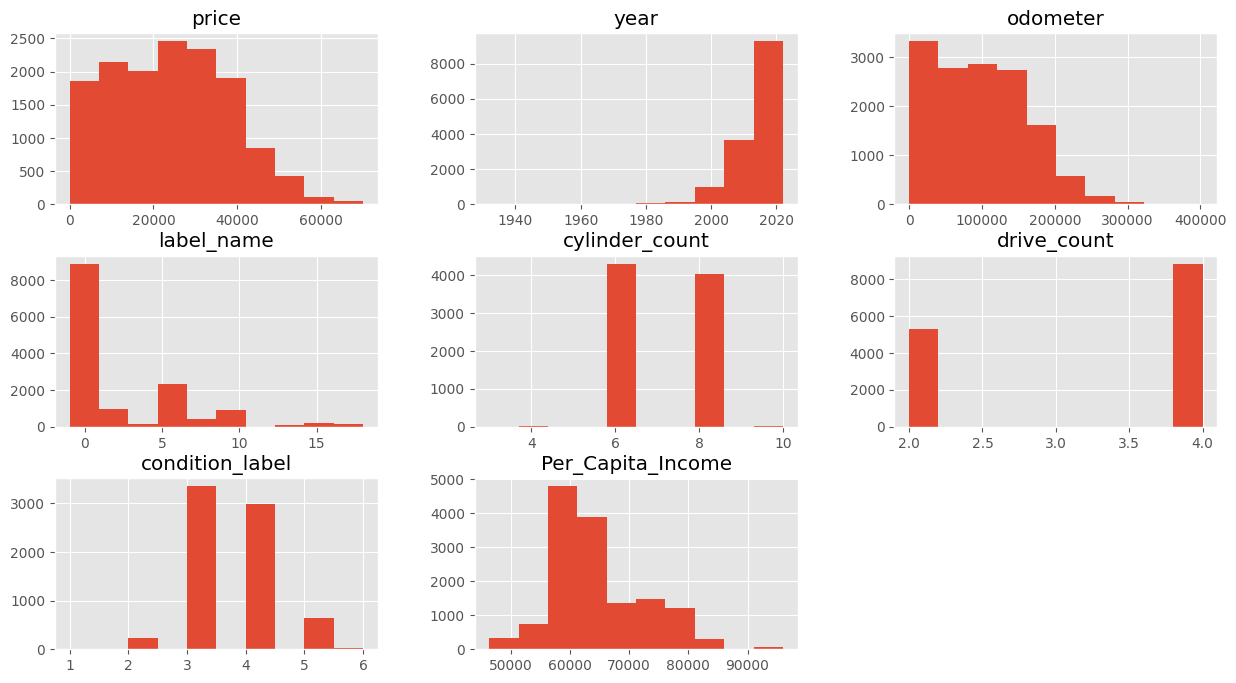

In [86]:
f150_data_cleaned.hist(figsize = (15,8));


In [87]:
corr = f150_data_cleaned.corr(numeric_only = True).round(2)

In [88]:
corr

,price,year,odometer,label_name,cylinder_count,drive_count,condition_label,Per_Capita_Income,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,color_rare,fuel_gas,fuel_hybrid,fuel_other
price,1.00,0.71,-0.67,0.31,-0.38,0.27,0.14,0.02,0.00,-0.06,-0.04,-0.05,-0.06,-0.15,0.16,-0.07,-0.10,-0.00,0.09
year,0.71,1.00,-0.54,0.19,-0.39,0.17,0.16,-0.03,0.00,-0.13,-0.03,-0.00,-0.02,-0.29,0.19,-0.12,-0.12,0.00,0.12
odometer,-0.67,-0.54,1.00,-0.21,0.41,-0.02,0.00,-0.03,-0.01,0.02,0.01,0.01,0.01,0.10,-0.36,0.08,0.16,-0.00,-0.16
label_name,0.31,0.19,-0.21,1.00,-0.08,0.09,-0.02,0.01,-0.00,-0.01,-0.01,-0.01,-0.01,-0.05,0.22,0.02,-0.09,0.00,0.08
cylinder_count,-0.38,-0.39,0.41,-0.08,1.00,0.12,0.07,0.04,-0.01,0.02,0.00,0.03,0.02,-0.06,-0.28,0.07,0.06,0.02,-0.07
drive_count,0.27,0.17,-0.02,0.09,0.12,1.00,0.17,0.05,0.02,-0.02,-0.03,-0.00,-0.02,-0.07,-0.24,0.02,0.04,-0.00,-0.05
condition_label,0.14,0.16,0.00,-0.02,0.07,0.17,1.00,0.05,0.04,-0.07,-0.04,0.01,-0.03,-0.09,-0.41,-0.06,0.27,-0.00,-0.28
Per_Capita_Income,0.02,-0.03,-0.03,0.01,0.04,0.05,0.05,1.00,-0.01,0.01,0.02,-0.04,-0.01,0.00,-0.01,0.01,-0.03,-0.00,0.03
title_status_lien,0.00,0.00,-0.01,-0.00,-0.01,0.02,0.04,-0.01,1.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.03,0.01,0.02,-0.00,-0.02
title_status_missing,-0.06,-0.13,0.02,-0.01,0.02,-0.02,-0.07,0.01,-0.00,1.00,-0.00,-0.00,-0.00,0.05,-0.00,0.00,0.01,-0.00,-0.01


#Correlation Matrix

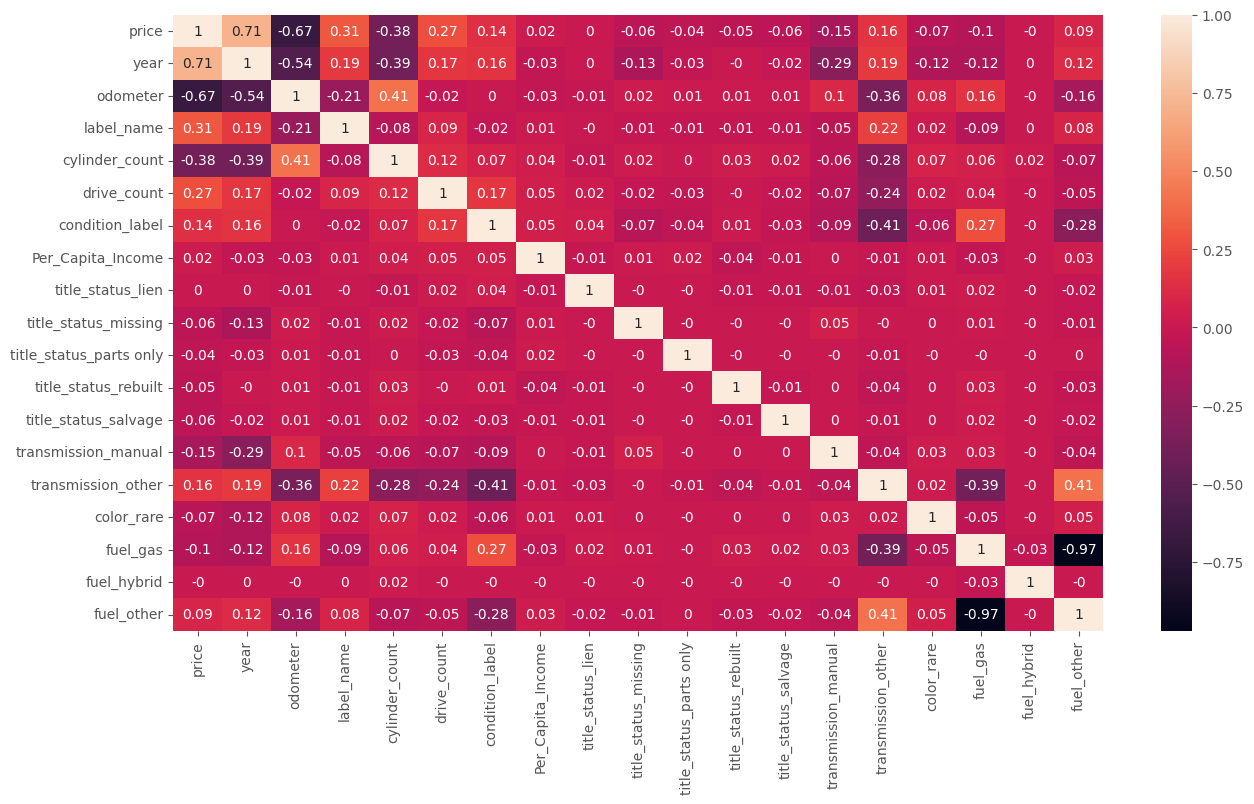

In [89]:
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True);

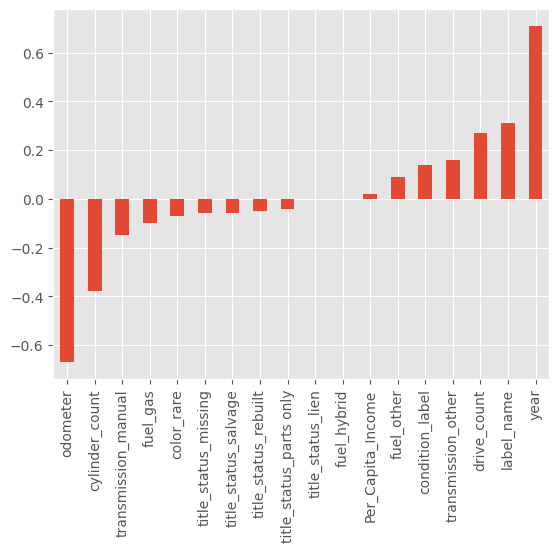

In [90]:
corr["price"][1:].sort_values().plot(kind = "bar");

In [91]:
#replace all label_name from -1 to nan
f150_data_cleaned['label_name'] = f150_data_cleaned['label_name'].replace(-1, np.nan)
#remove title_status_parts only column
f150_data_cleaned = f150_data_cleaned.drop(columns=['title_status_parts only'], axis=1)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [92]:
#drop all entries that have label nan
label_data = f150_data_cleaned.dropna()

label_data

,price,year,odometer,label_name,cylinder_count,drive_count,condition_label,Per_Capita_Income,title_status_lien,title_status_missing,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,color_rare,fuel_gas,fuel_hybrid,fuel_other
0,15000,2013.0,128000.0,5.0,6.0,2,4.0,50916.0,False,False,False,False,False,False,False,True,False,False
1,34590,2018.0,20856.0,2.0,6.0,2,3.0,50916.0,False,False,False,False,False,True,False,True,False,False
2,38990,2020.0,12231.0,5.0,6.0,2,3.0,50916.0,False,False,False,False,False,True,False,True,False,False
3,26990,2016.0,14230.0,2.0,6.0,2,3.0,50916.0,False,False,False,False,False,True,False,True,False,False
4,22590,2013.0,14169.0,2.0,6.0,2,3.0,50916.0,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15923,23495,2015.0,146795.0,5.0,8.0,4,5.0,73248.0,False,False,False,False,False,False,False,True,False,False
15928,26750,2015.0,117000.0,5.0,8.0,4,4.0,73248.0,False,False,False,False,False,False,False,True,False,False
15930,18999,2014.0,176261.0,5.0,8.0,4,4.0,73248.0,False,False,False,False,False,False,False,True,False,False
15931,24999,2014.0,147540.0,15.0,6.0,4,4.0,73248.0,False,False,False,False,False,False,False,True,False,False


In [93]:
print(label_data.isna().sum())
#drop condition_label and cylinder_count
# label_data = label_data.drop(['condition_label', 'cylinder_count'], axis=1)

price                   0
year                    0
odometer                0
label_name              0
cylinder_count          0
drive_count             0
condition_label         0
Per_Capita_Income       0
title_status_lien       0
title_status_missing    0
title_status_rebuilt    0
title_status_salvage    0
transmission_manual     0
transmission_other      0
color_rare              0
fuel_gas                0
fuel_hybrid             0
fuel_other              0
dtype: int64


In [94]:
y= label_data[['price']]
X= label_data.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [95]:
# creating the scaled version which will be updated
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
# intiate the Standard Scaler
scale = StandardScaler()

# fit transform on the train data
X_train_scaled[:] = scale.fit_transform(X_train[:])

# Test data
X_test_scaled[:] = scale.transform(X_test[:])

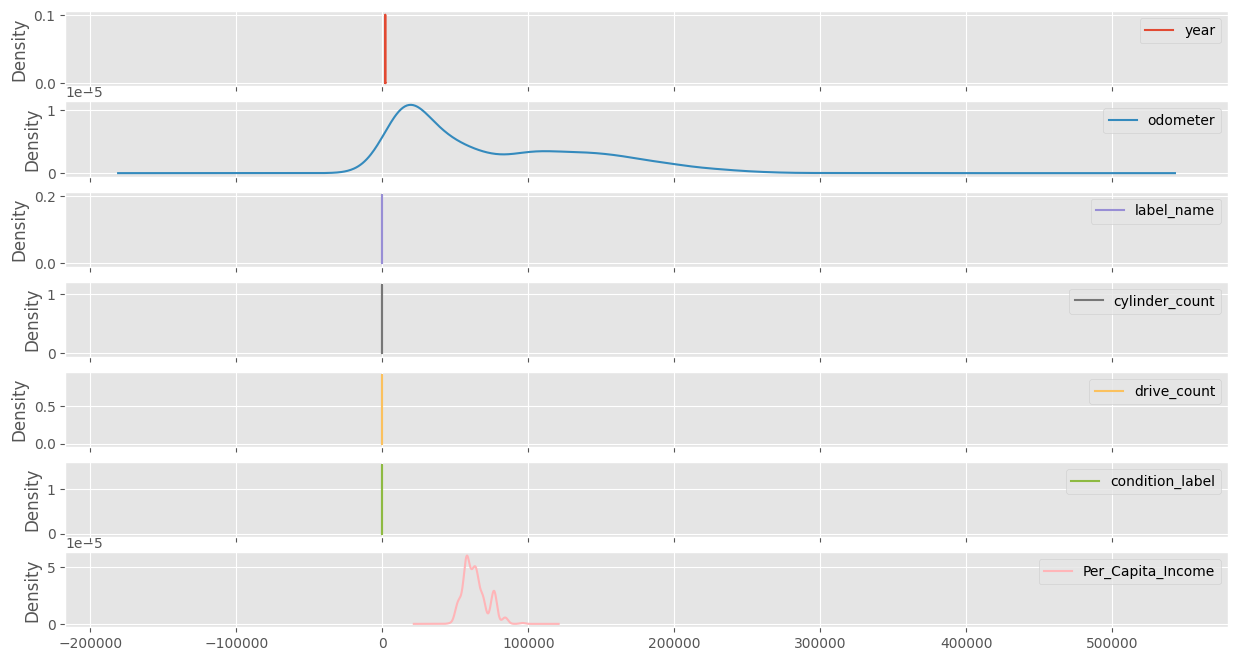

In [98]:
X_train.plot(kind = 'kde', subplots = True, figsize = (15,8));

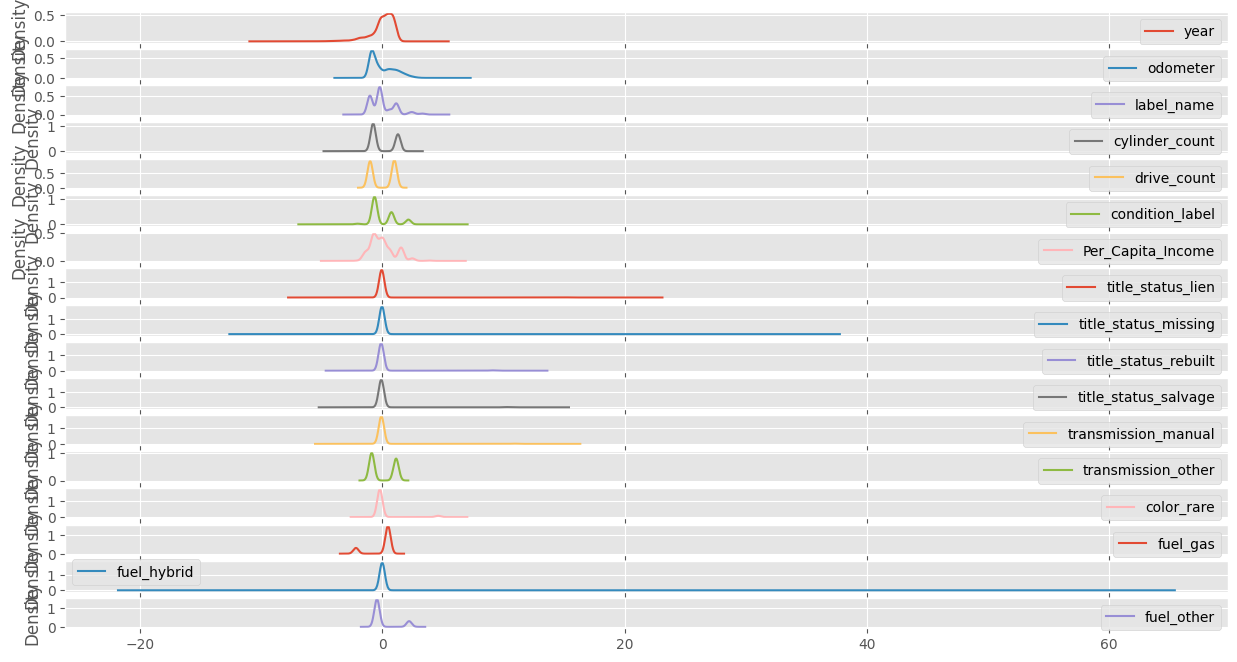

In [99]:
X_train_scaled.plot(kind = 'kde', subplots = True,figsize = (15,8));

In [100]:
X_train.agg(["mean", "std"]).round(1)

,year,odometer,label_name,cylinder_count,drive_count,condition_label,Per_Capita_Income,title_status_lien,title_status_missing,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,color_rare,fuel_gas,fuel_hybrid,fuel_other
mean,2013.9,74445.1,5.8,6.8,3.0,3.5,63734.8,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.8,0.0,0.2
std,5.2,64335.7,3.7,1.0,1.0,0.7,8295.4,0.1,0.0,0.1,0.1,0.1,0.5,0.2,0.4,0.0,0.4


In [101]:
X_train_scaled.agg(["mean", "std"]).round(1)

,year,odometer,label_name,cylinder_count,drive_count,condition_label,Per_Capita_Income,title_status_lien,title_status_missing,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,color_rare,fuel_gas,fuel_hybrid,fuel_other
mean,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel



linear_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 1, include_bias = False)),
    ('linear', LinearRegression())
])
linear_param_dict={
    'poly_features__degree': [2],
}
linear_grid= GridSearchCV(estimator=linear_pipe, param_grid=linear_param_dict)

#Select polynomial degree
Select polynomial degree best sutied for our model by performing a GridSearchCV and checking which degree performs the best.

In [103]:
#To select the best degree for the model we are performing a GridSearchCV for it
degree_param_dict={
    'poly_features__degree': [1,2,3,4],
}
degree_grid= GridSearchCV(estimator=linear_pipe, param_grid=degree_param_dict)
degree_grid.fit(X_train_scaled, y_train)
degree_grid.best_params_
pd.DataFrame(degree_grid.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly_features__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.031904,0.001215,0.005891,0.000786,2,{'poly_features__degree': 2},0.824187,0.754226,0.784373,0.831112,0.877058,0.814191,0.042008,1
0,0.008988,0.001278,0.004249,0.000268,1,{'poly_features__degree': 1},0.773729,0.723118,0.765772,0.806064,0.816731,0.777083,0.033055,2
2,0.909792,0.002688,0.007792,0.000276,3,{'poly_features__degree': 3},-0.413772,0.042719,0.770323,-0.788160,0.784788,0.079179,0.628040,3
3,5.509562,1.583367,0.028645,0.009179,4,{'poly_features__degree': 4},-195.373263,-17.502477,-11.346410,-1506.281975,-67.125808,-359.525987,577.183225,4


#Model declaration
Declare **linear, ridge, lasso, model with laso based feature selection**. Also declare GridSearchCV to test the best alpa value for a all 4 degree 2 models

In [104]:


ridge_param_dict={
    'poly_features__degree': [2],
    'ridge__alpha': np.linspace(0.001, 100, num=50)
}
ridge_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 1, include_bias = False)),
    ('ridge', Ridge())
])
ridge_grid= GridSearchCV(estimator=ridge_pipe, param_grid=ridge_param_dict)

lasso_feature_selection_param_dict={
    'poly_features__degree': [2],
    'selector__estimator__alpha': np.linspace(0.001, 50, num=50)
}

lasso_feature_selection_pipe= Pipeline([('poly_features', PolynomialFeatures(degree = 1, include_bias = False)),
                                ('selector', SelectFromModel(estimator=Lasso(alpha=1, random_state=42))),
                                ('lasso_feature_selection_model', LinearRegression())])
lasso_feature_selection_grid= GridSearchCV(estimator=lasso_feature_selection_pipe, param_grid=lasso_feature_selection_param_dict)

lasso_paam={
    'poly_features__degree': [2],
    'lasso__alpha': np.linspace(0.001, 50, num=50)
}
lasso_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 1, include_bias = False)),
    ('lasso', Lasso(alpha=1))
])
lasso_grid= GridSearchCV(estimator=lasso_pipe, param_grid=lasso_paam)

models = {
    'linear': linear_grid,
    'ridge': ridge_grid,
    'lasso': lasso_grid,
    'lasso_feature_selection_model': lasso_feature_selection_grid
}




In [105]:
linear_pipe.fit(X_train_scaled, y_train)


ridge_pipe.fit(X_train_scaled, y_train)


lasso_pipe.fit(X_train_scaled, y_train)




Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('lasso', Lasso(alpha=1))])

#Coefficient Comparison
Coefficient Comparison for a degree 1 model

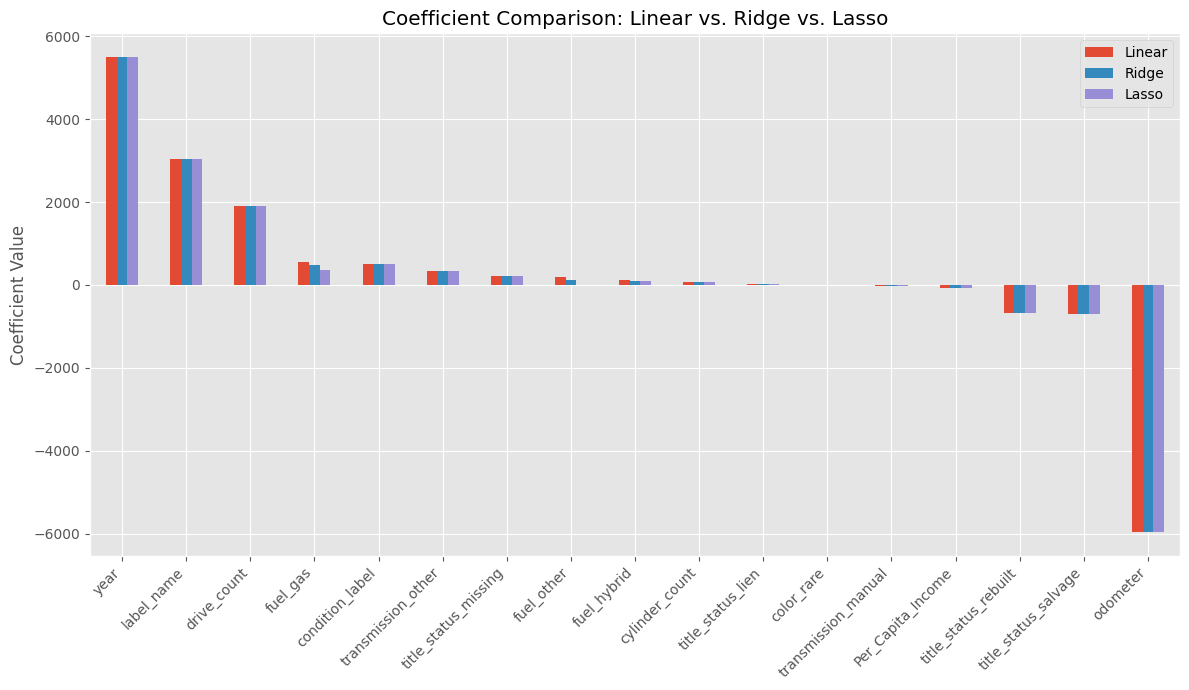

In [106]:

linear_coef = linear_pipe.named_steps['linear'].coef_
linear_feature_names = linear_pipe.named_steps['poly_features'].get_feature_names_out(X_train.columns)
linear_coef_df = pd.DataFrame({'Coefficient Value': np.ravel(linear_coef)}, index=linear_feature_names)
linear_coef_df = linear_coef_df.sort_values(by = "Coefficient Value", ascending = False)


ridge_coef = ridge_pipe.named_steps['ridge'].coef_
ridge_feature_names = ridge_pipe.named_steps['poly_features'].get_feature_names_out(X_train.columns)
ridge_coef_df = pd.DataFrame({'Coefficient Value': np.ravel(ridge_coef)}, index=ridge_feature_names)
ridge_coef_df = ridge_coef_df.sort_values(by = "Coefficient Value", ascending = False)


lasso_coef = lasso_pipe.named_steps['lasso'].coef_
lasso_feature_names = lasso_pipe.named_steps['poly_features'].get_feature_names_out(X_train.columns)
lasso_coef_df = pd.DataFrame({'Coefficient Value': np.ravel(lasso_coef)}, index=lasso_feature_names)
lasso_coef_df = lasso_coef_df.sort_values(by = "Coefficient Value", ascending = False)




#Compare coefients from diffent models
df_lin  = linear_coef_df.rename(columns={'Coefficient Value': 'Linear'})
df_rid  = ridge_coef_df.rename(columns={'Coefficient Value': 'Ridge'})
df_las  = lasso_coef_df.rename(columns={'Coefficient Value': 'Lasso'})

combined_df = pd.concat([df_lin, df_rid, df_las], axis=1)

# (Optional) Sort by Linear coefficients for consistent ordering
combined_df = combined_df.sort_values(by='Linear', ascending=False)

# Plot a grouped bar chart
ax = combined_df.plot(
    kind='bar',
    figsize=(12, 7),
    title='Coefficient Comparison: Linear vs. Ridge vs. Lasso'
)
ax.set_ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [107]:
# create copies of train and test to store predictions
y_train_pred = y_train.copy()
y_test_pred = y_test.copy()

#Hyperparameter selection training

In [108]:
results = {}

for name, model in models.items():

    # fit the model
    model.fit(X_train_scaled, y_train)

    # train predictions
    y_pred_train = model.predict(X_train_scaled)

    # test predictions
    y_pred_test = model.predict(X_test_scaled)
    best_model=model.best_estimator_
    # add another key to the dictionary
    results[name] = {
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Coefficients': best_model.named_steps[name].coef_,
        'Result': pd.DataFrame(model.cv_results_).sort_values(by = 'rank_test_score')
        }
    # add in the dataframe
    y_train_pred[name] = model.predict(X_train_scaled)
    y_test_pred[name] = model.predict(X_test_scaled)

In [109]:
y_train_pred.head(4).round(2)

,price,linear,ridge,lasso,lasso_feature_selection_model
619,25990,34278.47,34018.20,34437.03,34279.98
11983,33990,30635.68,30170.92,30428.88,30731.24
9479,12500,6831.82,6523.68,7926.97,6640.02
7960,30990,27148.55,27163.38,26688.30,26848.58


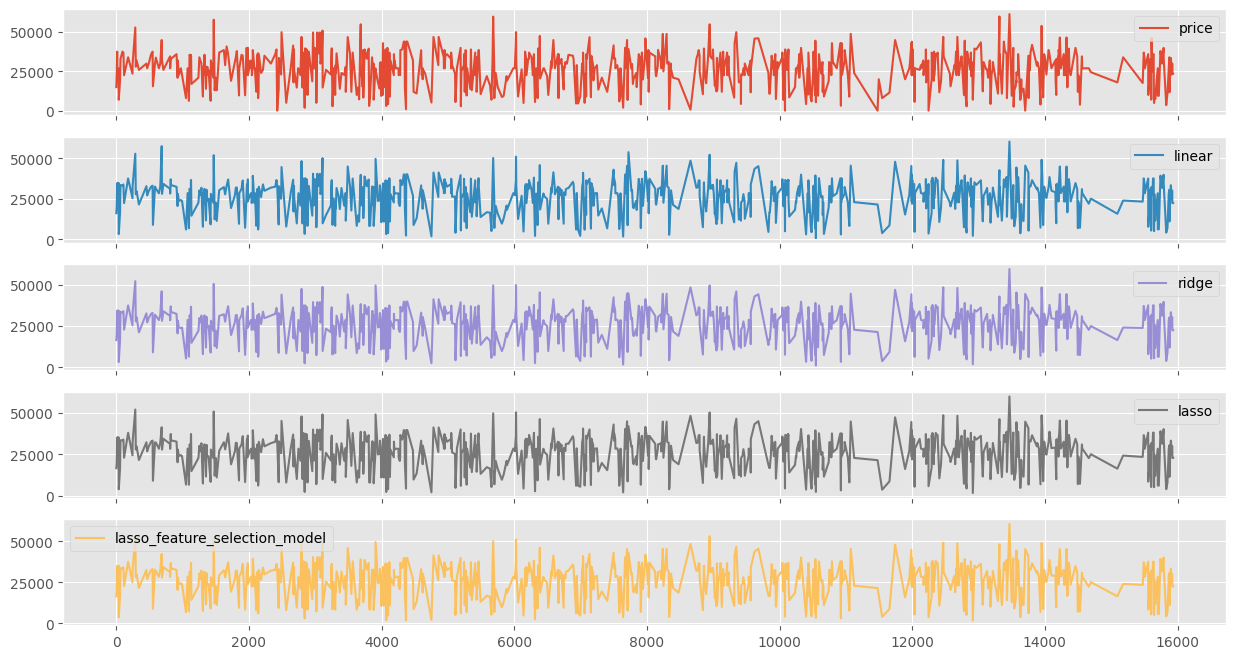

In [110]:
y_test_pred.sort_index().plot(kind = 'line', figsize = (15,8), subplots = True);

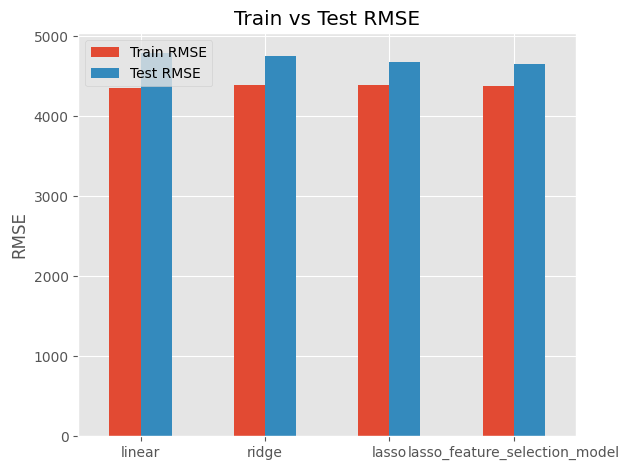

,Train RMSE,Test RMSE
linear,4351.797093,4795.590181
ridge,4384.314572,4750.297393
lasso,4386.24389,4673.410255
lasso_feature_selection_model,4375.466542,4653.962103


In [111]:
rmse_df = pd.DataFrame(results).T[['Train RMSE', 'Test RMSE']]
rmse_df.plot(kind='bar', title='Train vs Test RMSE')
plt.ylabel("RMSE")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
rmse_df

In [112]:
# Best hyperperamter selection
#print all top 4 rows for Result column from results table
#print them in a tabular format with intendation


for key, value in results.items():
    print(f"Model: {key}")
    # print top 4 rows of the result dataframe with indentation, showing only 'params' and 'rank_test_score'
    result_string = value['Result'].head(4)[['params', 'rank_test_score']].to_string(index=False)
    lines = result_string.split('\n')
    indented_lines = [lines[0]] + ['    ' + line for line in lines[1:]]
    print('\n'.join(indented_lines))
    print("\n")

Model: linear
                      params  rank_test_score
    {'poly_features__degree': 2}                1


Model: ridge
                                                          params  rank_test_score
    {'poly_features__degree': 2, 'ridge__alpha': 51.020897959183664}                1
    {'poly_features__degree': 2, 'ridge__alpha': 53.061693877551015}                2
     {'poly_features__degree': 2, 'ridge__alpha': 48.98010204081632}                3
     {'poly_features__degree': 2, 'ridge__alpha': 55.10248979591836}                4


Model: lasso
                                                          params  rank_test_score
    {'lasso__alpha': 31.633020408163265, 'poly_features__degree': 2}                1
    {'lasso__alpha': 32.653408163265304, 'poly_features__degree': 2}                2
     {'lasso__alpha': 33.67379591836735, 'poly_features__degree': 2}                3
    {'lasso__alpha': 30.612632653061226, 'poly_features__degree': 2}                4


Model:

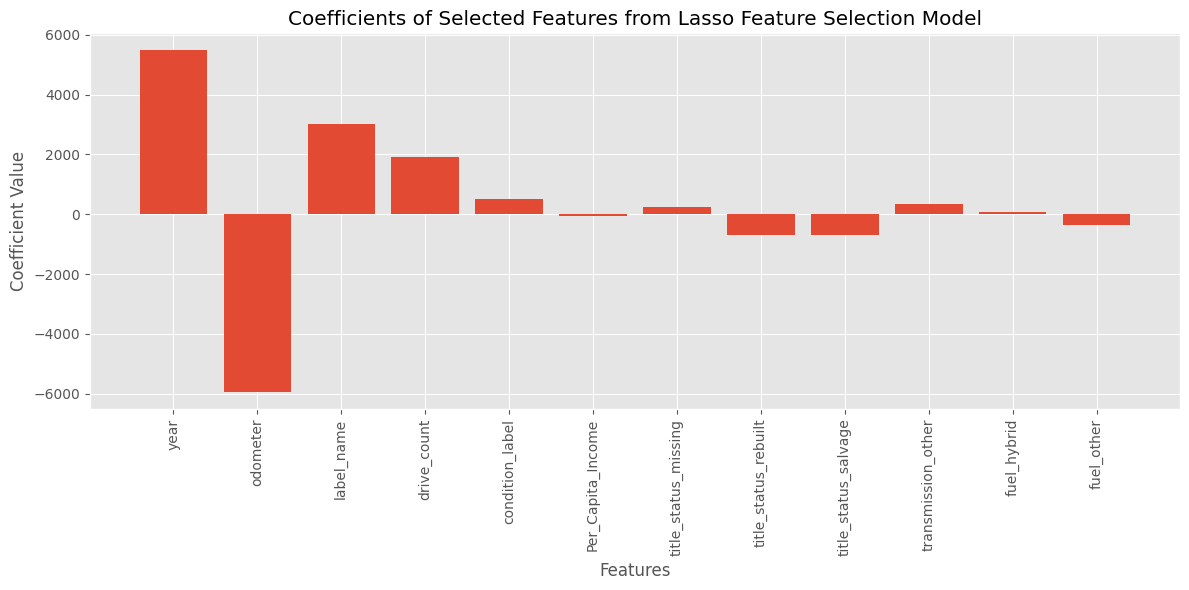

Non-Selected Features:
['cylinder_count' 'title_status_lien' 'transmission_manual' 'color_rare'
 'fuel_gas']


In [113]:
lasso_feature_selection_pipe= Pipeline([('poly_features', PolynomialFeatures(degree = 1, include_bias = False)),
                                ('selector', SelectFromModel(estimator=Lasso(alpha=50,random_state=42))),
                                ('lasso_feature_selection_model', LinearRegression())])
lasso_feature_selection_pipe.fit(X_train_scaled, y_train)

# Get the names of the selected features
selected_features_mask = lasso_feature_selection_pipe.named_steps['selector'].get_support()
# Get feature names after polynomial transformation
poly_feature_names = lasso_feature_selection_pipe.named_steps['poly_features'].get_feature_names_out(X_train.columns)
# Filter polynomial feature names to get only the selected ones
selected_feature_names = poly_feature_names[selected_features_mask]


# Get the coefficients of the linear regression model
coefficients = lasso_feature_selection_pipe.named_steps['lasso_feature_selection_model'].coef_[0]

# Plot coefficients of the selected features
plt.figure(figsize=(12, 6))
plt.bar(selected_feature_names, coefficients)
plt.xticks(rotation=90)
plt.title('Coefficients of Selected Features from Lasso Feature Selection Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

#Display names of all non-selected features
non_selected_features = poly_feature_names[~selected_features_mask]
print("Non-Selected Features:")
print(non_selected_features)


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#**Evaluation**

Our goal was to understand the key price drivers for used Ford F-150s. We trained Linear, Ridge, Lasso, and Lasso with Feature Selection models. We used GridSearchCV to select the best hyperparameters for each model, specifically focusing on the polynomial degree for feature transformation and the alpha value for regularization in Ridge and Lasso. Cross-validation ensured our hyperparameter choices and model performance were robust.

We chose Root Mean Squared Error (RMSE) as our evaluation metric. RMSE is suitable for regression tasks as it measures the average magnitude of the errors between predicted and actual prices, in the same units as the target variable (dollars).

All models showed similar performance with Test RMSE values around 46 to 47 percent.  The  Feature Selection with Lasso model had a slightly lower Test RMSE , suggesting it might be marginally better at generalizing.
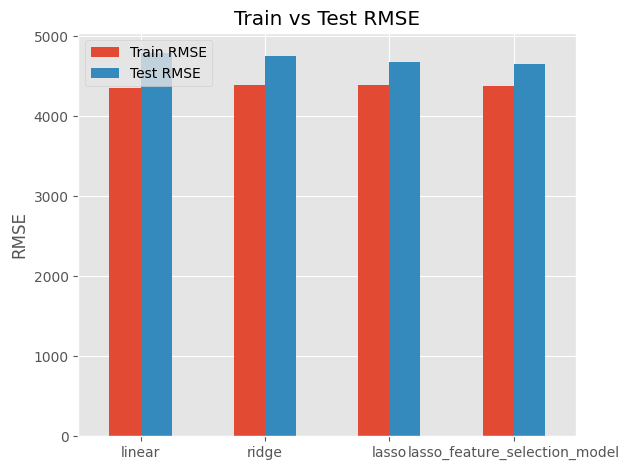

Interpreting the coefficients from the Lasso with Feature Selection model (which highlights important features) reveals key price drivers. The year has a large positive coefficient, indicating that newer trucks are significantly more expensive. Odometer has a large negative coefficient, showing that higher mileage strongly decreases the price. Other features, such as drive_count and label_name (representing trim level), also have positive coefficients, suggesting they contribute to a higher price, though their impact is less significant than year and odometer. Title status seems to have an impact on the price, where is the title status is rebuilt or salvage negitively impacts the price negatively. Also vehicles condition positively influences price. Features with coefficients shrunk to zero by Lasso are considered less important predictors of price.
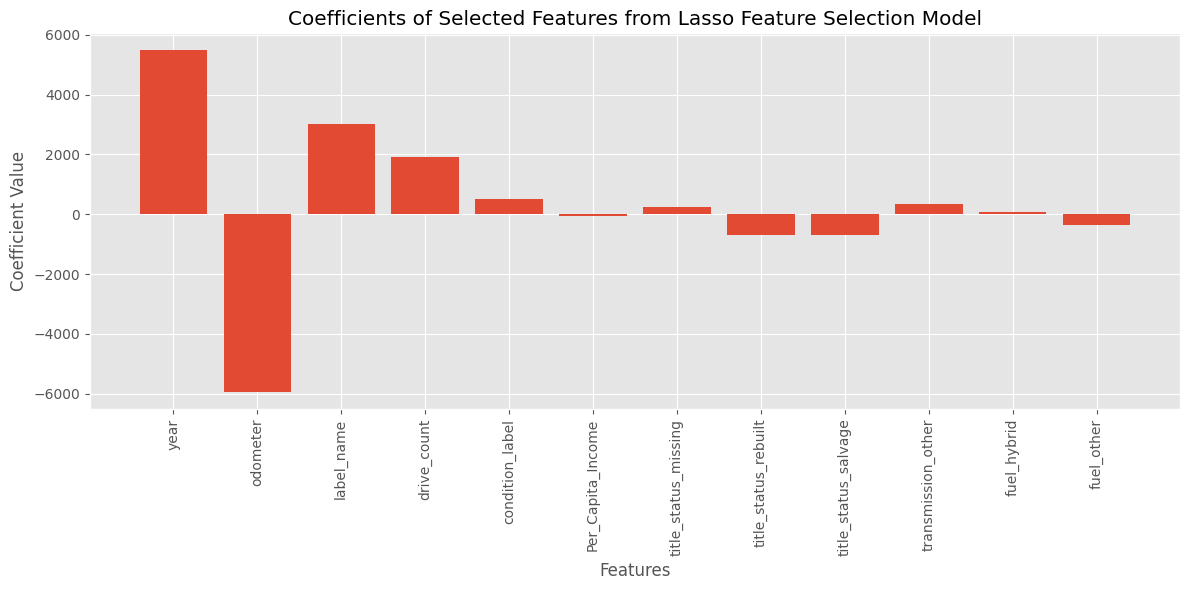


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

#Deployment
Based on our analysis and modeling of used Ford F-150 prices, we have identified key factors that significantly influence their market value. This information can be directly applied to optimize your inventory and pricing strategies.

Our models indicate that the year of manufacture and odometer reading are the strongest predictors of a used F-150's price. Newer trucks and those with lower mileage consistently command higher prices. This reinforces the importance of stocking newer, lower-mileage vehicles to maximize potential revenue.

Beyond age and mileage, other factors also play a role:

Trim Level (label_name): Higher trim levels are associated with higher prices. Understanding the market demand for specific trims in your region can help you acquire inventory that aligns with customer preferences and price expectations.
Drive Type (drive_count): Trucks with 4-wheel drive (drive_count = 4) tend to have higher prices, reflecting their value in certain markets or for specific customer needs.
Title Status (title_status_rebuilt, title_status_salvage): While having negative coefficients, indicating a lower price compared to a clean title.
Condition (condition_label): The condition of the truck also positively impacts the price, with better conditions correlating to higher values.

Recommendations for the Dealership:

Prioritize newer, lower-mileage F-150s: These vehicles have the strongest positive impact on price.
Stock a variety of popular trim levels: Cater to customer demand for different feature sets, as trim level influences price.
Consider the drive type based on your market: If your dealership is in an area where 4x4 is popular, prioritize acquiring those vehicles.
Be aware of title status: Vehicles with rebuilt or salvage titles will likely command lower prices. Factor this into your purchasing and pricing decisions.
Assess and highlight vehicle condition: Since better condition positively influences price, accurately assessing and marketing the condition of your inventory is important.

By focusing on these key drivers, your dealership can make more informed decisions about acquiring inventory, pricing vehicles, and ultimately, improving profitability in the used Ford F-150 market.